## Step 1 : Business Problem Understanding
- Provided with a data of different colleges to check wheather a student gets admission in respective university with percentage of confidence.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 : Data Understanding
#### Loading Data & observing each variable

In [2]:
df = pd.read_csv("admission_predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
# pd.set_option("Display.max_rows",None)

#### DataSet Understanding

In [4]:
df["Serial No."].nunique()

500

In [5]:
df.drop(columns=["Serial No."],inplace=True)

In [6]:
df["GRE Score"].nunique()

49

In [7]:
df["GRE Score"].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293], dtype=int64)

In [8]:
df["GRE Score"].min()

290

In [9]:
df["GRE Score"].max()

340

In [10]:
df["TOEFL Score"].nunique()

29

In [11]:
df["TOEFL Score"].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92], dtype=int64)

In [12]:
df["TOEFL Score"].min()

92

In [13]:
df["TOEFL Score"].max()

120

In [14]:
df["University Rating"].nunique()

5

In [15]:
df["University Rating"].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [16]:
df["SOP"].nunique()

9

In [17]:
df["SOP"].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [18]:
df["SOP"].min()

1.0

In [19]:
df["SOP"].max()

5.0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [21]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [22]:
df.rename(columns={"LOR ":"LOR"},inplace=True)

In [23]:
df.keys()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [24]:
df.rename(columns={"Chance of Admit ":"Chance of Admit"},inplace=True)

In [25]:
df["LOR"].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [26]:
df["LOR"].nunique()

9

In [27]:
df["LOR"].min()

1.0

In [28]:
df["LOR"].max()

5.0

In [29]:
df["CGPA"].nunique()

184

In [30]:
df["CGPA"].min()

6.8

In [31]:
df["CGPA"].max()

9.92

In [32]:
df['Research'].unique()

array([1, 0], dtype=int64)

In [33]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [34]:
df["Chance of Admit"].nunique()

61

In [35]:
df["Chance of Admit"].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [36]:
df.sort_values(by="Chance of Admit",ascending=True)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34
94,303,99,3,2.0,2.5,7.66,0,0.36
58,300,99,1,3.0,2.0,6.80,1,0.36
457,295,99,1,2.0,1.5,7.57,0,0.37
...,...,...,...,...,...,...,...,...
148,339,116,4,4.0,3.5,9.80,1,0.96
203,334,120,5,4.0,5.0,9.87,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97


In [37]:
df.shape

(500, 8)

#### Exploratory Data Analysis

In [38]:
categorical = []
continous = []
check = []

d_types = dict(df.dtypes)
for name , type in d_types.items():
    if str(type) == "object":
        categorical.append(name)
    elif str(type) == "float64":
        continous.append(name)
    else:
        check.append(name)

print("categorical features:",categorical)
print("continous features:",continous)
print("features to be checked:",check)

categorical features: []
continous features: ['SOP', 'LOR', 'CGPA', 'Chance of Admit']
features to be checked: ['GRE Score', 'TOEFL Score', 'University Rating', 'Research']


In [39]:
continous = ["GRE Score","TOEFL Score","SOP","LOR","CGPA","Chance of Admit"]
discrete = ["Research","University Rating"]
continous

['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']

In [40]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [41]:
df["University Rating"].mode()

0    3
Name: University Rating, dtype: int64

In [42]:
corr = df.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


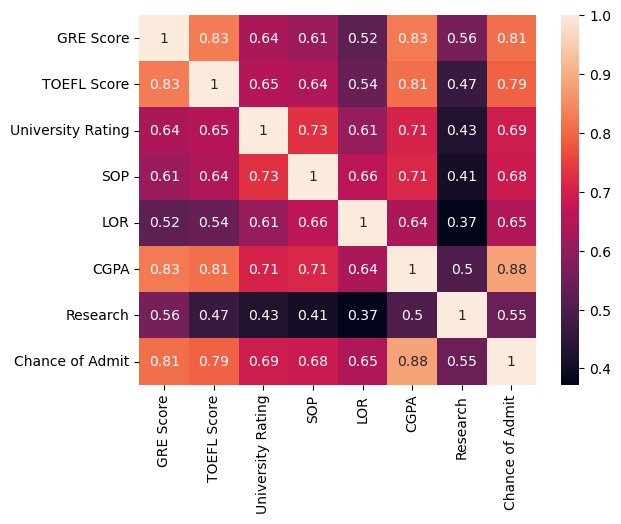

In [43]:
sns.heatmap(corr,annot=True)
plt.show()

In [44]:
df[continous].describe()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.00000,9.920000,0.97000


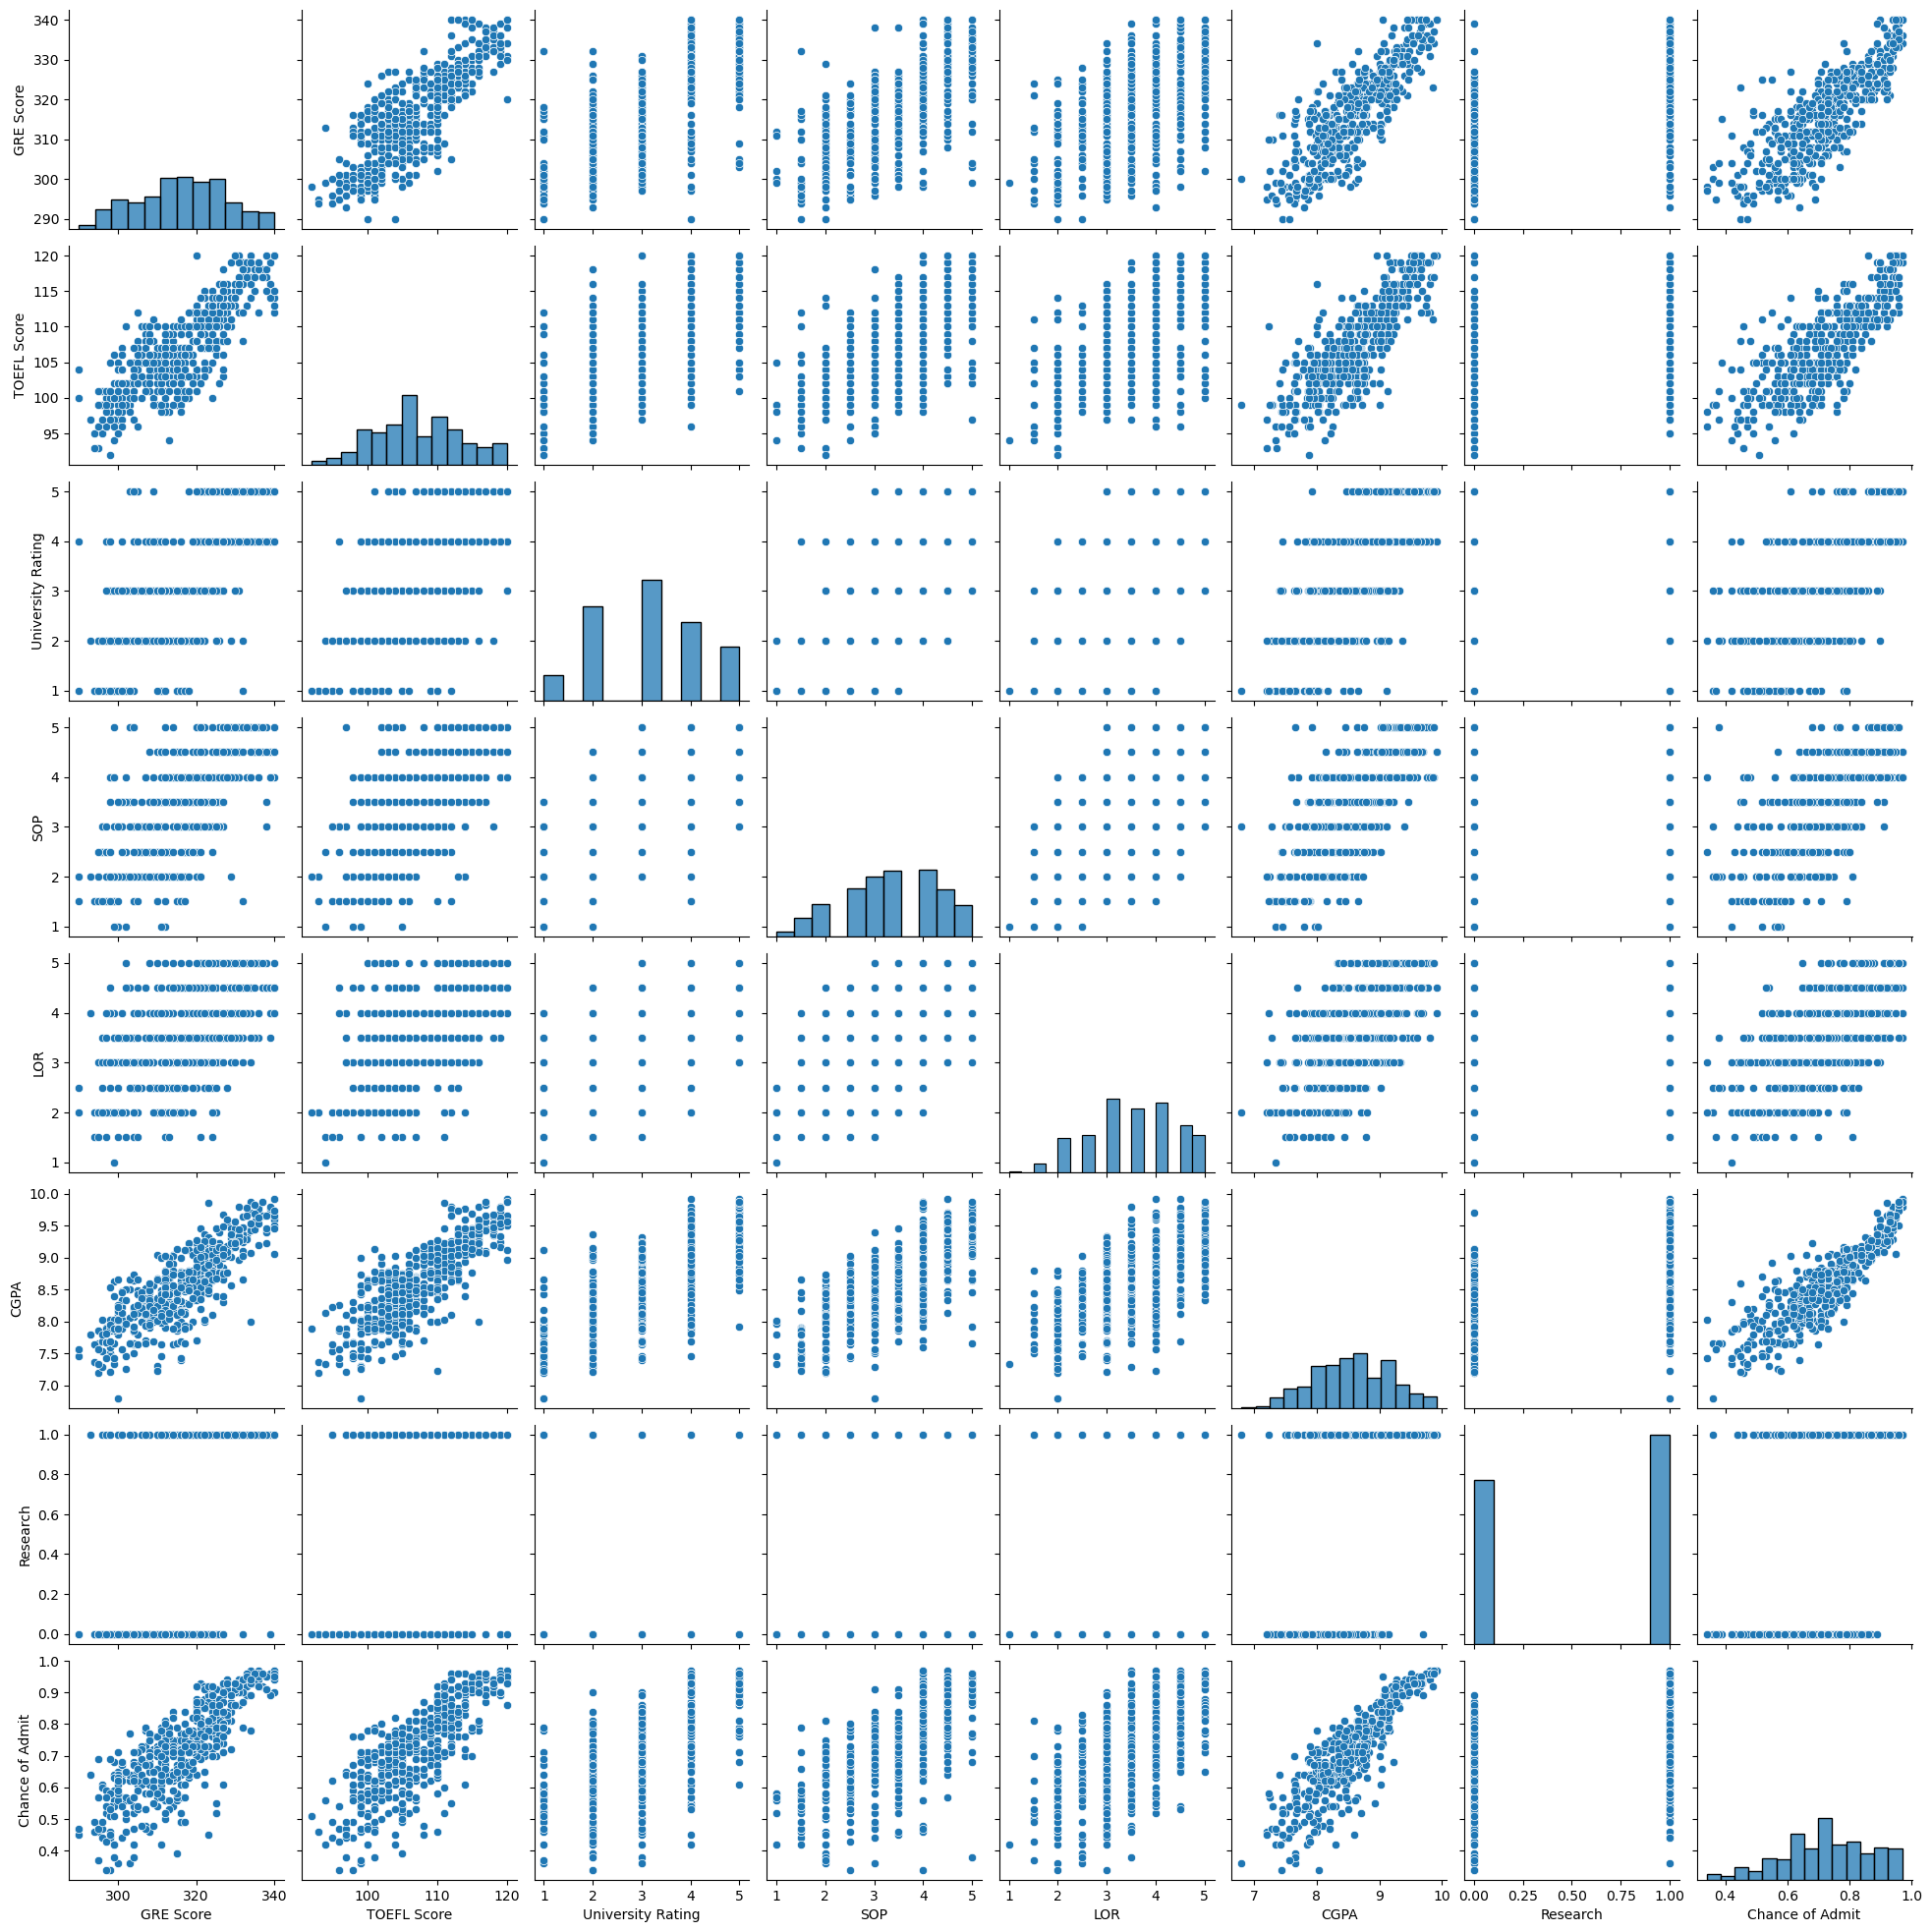

In [45]:
sns.pairplot(df)
plt.show()

In [46]:
df["GRE Score"].skew()

-0.03984185809159066

In [47]:
df["TOEFL Score"].skew()

0.09560097235726285

In [48]:
df["SOP"].skew()

-0.22897239628779945

In [49]:
df["LOR"].skew()

-0.1452903146082398

In [50]:
df["CGPA"].skew()

-0.026612517318359303

In [51]:
df["Chance of Admit"].skew()

-0.289966210041158

In [52]:
q1 = df["GRE Score"].quantile(0.25)
q1

308.0

In [53]:
q3 = df["GRE Score"].quantile(0.75)
q3

325.0

In [54]:
iqr = q3 - q1
iqr

17.0

In [55]:
ll = q1 - (1.5*iqr)
ll

282.5

In [56]:
ul = q3 + (1.5*iqr)
ul

350.5

In [57]:
df[(df["GRE Score"]<ll)|(df["GRE Score"]>ul)].shape

(0, 8)

In [58]:
q1 = df["TOEFL Score"].quantile(0.25)
q1

103.0

In [59]:
q3 = df["TOEFL Score"].quantile(0.75)
q3

112.0

In [60]:
iqr = q3 - q1
iqr

9.0

In [61]:
ll = q1 - (1.5*iqr)
ll

89.5

In [62]:
ul = q3 + (1.5*iqr)
ul

125.5

In [63]:
df[(df["TOEFL Score"]<ll)|(df["TOEFL Score"]>ul)].shape

(0, 8)

In [64]:
q1 = df["CGPA"].quantile(0.25)
q1

8.127500000000001

In [65]:
q3 = df["CGPA"].quantile(0.75)
q3

9.04

In [66]:
iqr = q3 - q1
iqr

0.9124999999999979

In [67]:
ll = q1 - (1.5*iqr)
ll

6.7587500000000045

In [68]:
ul = q3 + (1.5*iqr)
ul

10.408749999999996

In [69]:
df[(df["CGPA"]<ll)|(df["CGPA"]>ul)].shape

(0, 8)

## Step 3 : Data Preprocessing
#### Data Cleaning

In [70]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [71]:
df.duplicated().sum()

0

#### Create X & y

In [72]:
X = df.drop(columns=["Chance of Admit"])
y = df["Chance of Admit"]

In [73]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [74]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [75]:
Train = []
Test = []
CV = []

for i in range (0,10): # Try from (0,10),(0,20),(0,30),....(0,101)
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    ypred_train = model.predict(X_train)
    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train,ypred_train))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model,X_train,y_train,cv=5).mean())
    
em = pd.DataFrame({"Train":Train,"CV":CV})
gm = em[(abs(em["Train"]-em["CV"])<=0.05)]

print("Best random_state number is:", gm[gm["CV"]==gm["CV"].max()].index.to_list()[0])  

Best random_state number is: 8


## Linear Regression

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
# random_state = 8 is best

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("coefficient:",model.coef_)
print("intercept:",model.intercept_)

ypred_train = model.predict(X_train)

from sklearn.metrics import r2_score
print("Train r2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CSV:",cross_val_score(model,X_train,y_train,cv=5).mean())

coefficient: [ 0.00191141  0.00324231  0.0058481  -0.00215774  0.01650554  0.11999854
  0.02533459]
intercept: -1.3433815544396481
Train r2: 0.8293590251003071
CSV: 0.8224787960345953


In [78]:
ypred_test = model.predict(X_test)

print("Test r2:",r2_score(y_test,ypred_test))

Test r2: 0.7858508184037285


In [79]:
# checking for linearity
error = y_test - ypred_test

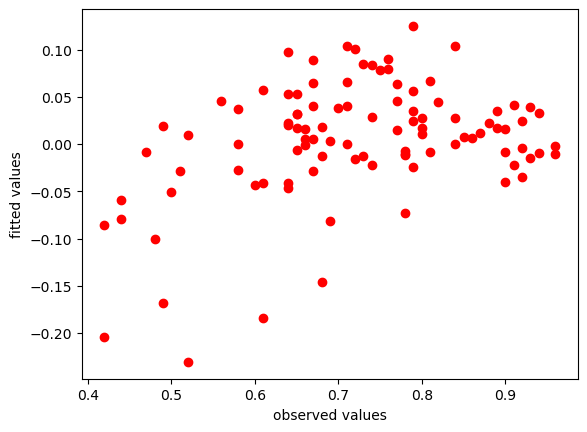

In [80]:
plt.scatter(y_test,error,c="r")
plt.xlabel("observed values")
plt.ylabel("fitted values")
plt.show()

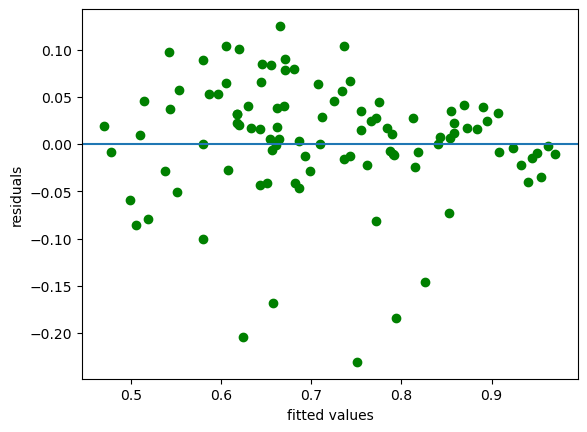

In [81]:
plt.scatter(ypred_test,error,c='g')
plt.axhline(0)
plt.xlabel("fitted values")
plt.ylabel('residuals')
plt.show()

In [82]:
error.skew()

-1.306219810452427

In [83]:
import statsmodels.formula.api as smf
model1 = smf.ols("y~X",data=df).fit() # ols = ordinary least squared
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          8.21e-180
Time:                        19:55:03   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2757      0.104    -12.232      0.000      -1.481      -1.071
X[0]           0.0019      0.001      3.700      0.000       0.001       0.003
X[1]           0.0028      0.001      3.184      0.002       0.001       0.004
X[2]           0.0059      0.004      1.563      0.119      -0.002       0.013
X[3]           0.0016      0.005      0.348      0.728      -0.007       0.011
X[4]           0.0169      0.004      4.074      0.000       0.009       0.025
X[5]           0.1184      0.010     12.198      0.000       0.099       0.137
X[6]           0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

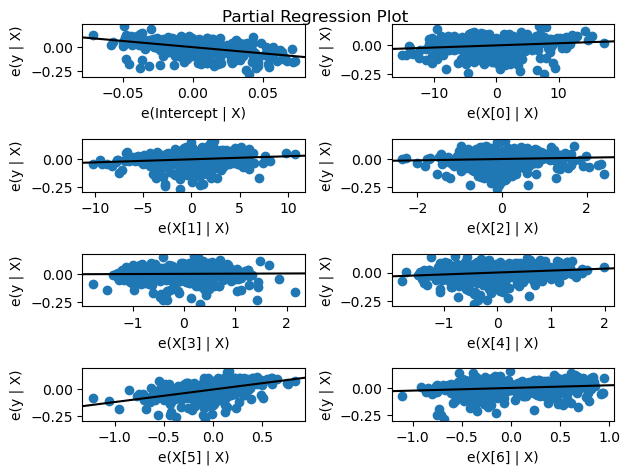

In [84]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()
# part_regress ==> partial Regressions plots
# sm.graphics.plot_partregress_grid(model1);
# we can also use ";" symbol at the end to display output only once

In [119]:
X = df.drop(columns=["SOP","Chance of Admit"])
y = df["Chance of Admit"]

In [120]:
X

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,337,118,4,4.5,9.65,1
1,324,107,4,4.5,8.87,1
2,316,104,3,3.5,8.00,1
3,322,110,3,2.5,8.67,1
4,314,103,2,3.0,8.21,0
...,...,...,...,...,...,...
495,332,108,5,4.0,9.02,1
496,337,117,5,5.0,9.87,1
497,330,120,5,5.0,9.56,1
498,312,103,4,5.0,8.43,0


In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
# random_state = 8 is best

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print("coefficient:",model.coef_)
print("intercept:",model.intercept_)

ypred_train = model.predict(X_train)

from sklearn.metrics import r2_score
print("Train r2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CSV:",cross_val_score(model,X_train,y_train,cv=5).mean())

ypred_test = model.predict(X_test)

print("Test r2:",r2_score(y_test,ypred_test))

coefficient: [0.00191578 0.00319632 0.00524222 0.01588621 0.11927228 0.02528497]
intercept: -1.3367969836294387
Train r2: 0.8292743579706157
CSV: 0.8229300102147532
Test r2: 0.7873306020207209


## Polynomial Regression / Non-linear Regression

In [88]:
df = pd.read_csv("admission_predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [89]:
df.rename(columns={"LOR ":"LOR"},inplace=True)
df.rename(columns={"Chance of Admit ":"Chance of Admit"},inplace=True)

df.drop(columns=["Serial No."],inplace=True)

In [90]:
X = df.drop(columns=["Chance of Admit"])
y = df["Chance of Admit"]

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=63)
# random_state = 63 for better accuracy

In [92]:
from sklearn.preprocessing import PolynomialFeatures
poly_con = PolynomialFeatures(degree=2)
X_train_poly = pd.DataFrame(poly_con.fit_transform(X_train))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

print("coefficient:",model.coef_)
print("intercept:",model.intercept_)

ypred_train = model.predict(X_train_poly)

from sklearn.metrics import r2_score
print("Train r2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CSV:",cross_val_score(model,X_train_poly,y_train,cv=5).mean())

coefficient: [ 5.58743872e+07  2.08418880e-03  5.94831290e-02 -9.17126925e-02
 -8.14578383e-02 -3.83703514e-03  2.85406993e-01 -2.00149622e-02
  4.15314995e-05 -1.29370984e-04  2.41415530e-04  2.12576152e-05
  1.40861025e-03 -2.02506710e-03 -1.66747020e-03 -1.33878694e-04
  6.40735405e-04  1.63555173e-03 -1.39662051e-03  1.11029268e-03
  1.51654555e-03 -2.82076901e-03  2.42272266e-02 -7.32891489e-03
 -1.04756495e-02  2.53217243e-03 -1.08401678e-02  8.09240424e-03
 -1.37632456e-02 -1.14735004e-02  6.32545213e-03 -3.72144427e-02
 -8.11185522e-03  3.03983662e-02  5.74334175e-02 -2.00149622e-02]
intercept: -55874391.890643016
Train r2: 0.8645619947175728
CSV: 0.8067432450036947


In [93]:
X_test_poly = pd.DataFrame(poly_con.transform(X_test))
ypred_test = model.predict(X_test_poly)

print("Train r2:",r2_score(y_train,ypred_train))

Train r2: 0.8645619947175728


In [94]:
train_r2 = []
test_r2 = []

for i in range(1,10):
    # preprocessing
    polynomial_converter = PolynomialFeatures(degree= i)
    X_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train))
    
    # modelling 
    model = LinearRegression()
    model.fit(X_train_poly,y_train)
    
    # prediction &  Evaluation on train data
    train_pred = model.predict(X_train_poly)
    train_r2.append(model.score(X_train_poly,y_train))
    
    # transformation on test data
    X_test_poly = pd.DataFrame(polynomial_converter.transform(X_test))
    
    # prediction &  Evaluation on Train data
    test_pred = model.predict(X_test_poly)
    test_r2.append(model.score(X_test_poly,y_test))

In [95]:
train_r2

[0.8467106188151237,
 0.8645619947175728,
 0.8879699589392138,
 0.9168843013466053,
 0.9996713866386145,
 0.999878726491425,
 0.9998373110471703,
 0.999639609865097,
 0.9996781459812295]

In [96]:
test_r2

[0.7351011929758546,
 0.7296685901105244,
 0.6954568179237406,
 -3.1532639477454962,
 -422.57915473677843,
 -579.3274237856,
 -548.5418518454327,
 -547.2840380217364,
 -522.3731425023494]

In [97]:
from sklearn.preprocessing import PolynomialFeatures
poly_con = PolynomialFeatures(degree=1)
X_train_poly = pd.DataFrame(poly_con.fit_transform(X_train))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

print("coefficient:",model.coef_)
print("intercept:",model.intercept_)

ypred_train = model.predict(X_train_poly)

from sklearn.metrics import r2_score
print("Train r2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CSV:",cross_val_score(model,X_train_poly,y_train,cv=5).mean())

coefficient: [0.         0.00229848 0.0025259  0.00246654 0.00436219 0.01813248
 0.11032435 0.02512465]
intercept: -1.3194600162346937
Train r2: 0.8467106188151237
CSV: 0.834102218830868


In [98]:
X_test_poly = pd.DataFrame(poly_con.transform(X_test))
ypred_test = model.predict(X_test_poly)

print("Train r2:",r2_score(y_train,ypred_train))

Train r2: 0.8467106188151237


## Lasso Regression

In [99]:
X = df.drop(columns=["Chance of Admit"])
y = df["Chance of Admit"]

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
# random_state = 8 for better accuracy

In [101]:
import warnings
warnings.simplefilter("ignore")

In [102]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
estimator = Lasso()

param_grid = {"alpha":list(range(0,10))}

model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 0}

In [103]:
# Modelling

lasso_best = Lasso(alpha=0.01)
lasso_best.fit(X_train,y_train)

print("Intercept:",lasso_best.intercept_)
print("coefficeint:",lasso_best.coef_)

# prediction and Evaluation on train Data
ypred_train = lasso_best.predict(X_train)

from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(lasso_best,X_train,y_train,cv=5).mean())

# prediction and Evaluation on Test Data
ypred_test = lasso_best.predict(X_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -1.915047171989684
coefficeint: [0.00520418 0.00657816 0.00583657 0.         0.01536328 0.02462032
 0.        ]
Train R2: 0.7796163949457883
CV Score: 0.77284643733624
Test R2: 0.7165157356426441


In [104]:
df.keys()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [105]:
X = df.drop(columns=["SOP"])
y = df["Chance of Admit"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
# random_state = 8 for better accuracy

lasso_best = Lasso(alpha=0.001)
lasso_best.fit(X_train,y_train)

print("Intercept:",lasso_best.intercept_)
print("coefficeint:",lasso_best.coef_)

# prediction and Evaluation on train Data
ypred_train = lasso_best.predict(X_train)

from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(lasso_best,X_train,y_train,cv=5).mean())

# prediction and Evaluation on Test Data
ypred_test = lasso_best.predict(X_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -0.3999314925560242
coefficeint: [8.63224984e-04 1.10095561e-03 1.43305983e-03 3.87328518e-03
 1.90682229e-02 4.50695278e-04 7.59873621e-01]
Train R2: 0.9894474770709759
CV Score: 0.9887430771280943
Test R2: 0.9866310231093744


## Ridge Regression 

In [106]:
X = df.drop(columns=["Chance of Admit"])
y = df["Chance of Admit"]

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
# random_state = 8 for better accuracy

In [108]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
estimator = Ridge()

param_grid = {"alpha":list(range(1,10))}

model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [109]:
ridge_best = Ridge(alpha=1)
ridge_best.fit(X_train,y_train)

print("Intercept:",ridge_best.intercept_)
print("coefficients:",ridge_best.coef_)

ypred_train = ridge_best.predict(X_train)

from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CSV:",cross_val_score(ridge_best,X_train,y_train,cv=5).mean())

ypred_test = ridge_best.predict(X_test)

print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -1.3525873434282378
coefficients: [ 0.00200052  0.00333828  0.00608039 -0.00183114  0.01676839  0.11628357
  0.02498186]
Train R2: 0.8293053385938982
CSV: 0.8224263993668448
Test R2: 0.7859973483286554


## Elastic Net

In [110]:
X = df.drop(columns=["Chance of Admit"])
y = df["Chance of Admit"]

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
# random_state = 8 for better accuracy

In [112]:
from sklearn.model_selection import GridSearchCV

# model 
from sklearn.linear_model import ElasticNet
estimator = ElasticNet()

# parameters and values
param_grid = {"alpha":[0.1,0.2,1,2,3,5,10],"l1_ratio":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

# model with best hyperparameters
model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring="r2")

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 0.1, 'l1_ratio': 0}

In [113]:
enr_best = ElasticNet(alpha=0.01,l1_ratio=0)
enr_best.fit(X_train,y_train)

print("Intercept:",enr_best.intercept_)
print("Coefficient:",enr_best.coef_)

ypred_train = enr_best.predict(X_train)

from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CSV :",cross_val_score(enr_best,X_train,y_train,cv=5).mean())

ypred_test = enr_best.predict(X_test)

print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -1.3777247593177446
Coefficient: [ 0.00223897  0.00359381  0.00669026 -0.00095572  0.01743038  0.10644125
  0.0239804 ]
Train R2: 0.8286418929882589
CSV : 0.8218367620744322
Test R2: 0.7857976250498917


# Final Model

In [114]:
# Lasso Regression

In [115]:
input_data = {"GRE Score":300,"TOEFL Score":100,"University Rating":2,"SOP":3,"LOR ":4,"CGPA":6.8,"Research":1}
df_test = pd.DataFrame(input_data,index=[0])
df_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,300,100,2,3,4,6.8,1


In [116]:
df_test.rename(columns={"LOR ":"LOR","Chance of Admit ":"Chance of Admit"},inplace=True)
df_test.drop(columns=["SOP"],inplace=True)

In [117]:
transformed_data = df_test